<a href="https://colab.research.google.com/github/LokeshDaga/ML_Assignment/blob/master/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Question-1
import numpy as np
import pandas as pd
import math 
import sys
import pylab
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn import datasets
import warnings 
warnings.filterwarnings("ignore")
#1.a)Generating the dataset
X = np.random.uniform(0,1,10)
PI = math.pi  
Y = []   
for i in range(10): 
    Y.append(math.sin(2*PI*X[i])) 
    i+=1
noice = np.random.normal(0,.3,10)
Y = Y + noice
#spliting the data_set into training and test 
x_train, x_test, y_train, y_test = tts(X,Y,test_size=0.2,train_size=0.8)
print("Trainingset X:\n",x_train)
print("Trainingset Y:\n",y_train)
print("Testingset X:\n",x_test)
print("Testingset Y:\n",y_test)


Trainingset X:
 [0.14847731 0.07076004 0.2816825  0.49287357 0.51758055 0.72539322
 0.45691206 0.71167226]
Trainingset Y:
 [ 0.34801571  0.32143447  1.00829846  0.25718848  0.05904799 -1.06423554
  0.32760281 -0.96725508]
Testingset X:
 [0.72315258 0.68660821]
Testingset Y:
 [-1.92833321 -1.53053425]


In [ ]:
#1.c
def train(MAX_ITER = 5000, ALPHA = 0.05):
	train_error = []
	test_error = []
	rmse_error = []

	for DEGREE in range(1, 10):
		print("\nDegree: "+str(DEGREE))
		W = np.random.uniform(0, 1, DEGREE + 1)

		for i in range(MAX_ITER):
			cost = 0.0
			cost_val = 0.0
			sum_ = 0.0
			rmse = 0.0
			sum_list = np.zeros(DEGREE + 1)
			for m in range(len(x_train)):
				X = x_train[m]
				Y = y_train[m]
				X_power = np.array([X**j for j in range(DEGREE+1)])

				Y_pred = np.dot(W, X_power)
				sum_ = (Y_pred - Y)
				sum_list_here = [sum_ * j for j in X_power]
				sum_list += sum_list_here

				cost += (Y - Y_pred)**2

			cost/= (2 * (m+1))

			W -= (ALPHA/(len(x_train))) * sum_list
			print("Cost at iter "+str(i)+"/"+str(MAX_ITER)+": "+str(cost), end="\r")

			for m in range(len(x_test)):
				X = x_test[m]
				Y = y_test[m]
				X_power = np.array([X**j for j in range(DEGREE+1)])

				Y_pred = np.dot(W, X_power)

				cost_val += (Y - Y_pred)**2
				rmse += (Y - Y_pred)**2

			cost_val /= 2* (m+1)
			rmse = math.sqrt(float(rmse / (m + 1)))

		train_error.append(cost)
		test_error.append(cost_val)
		rmse_error.append(rmse)
		np.save("W_"+str(DEGREE), W)

	return train_error, test_error, rmse_error


train()


	



Degree: 1
Cost at iter 4999/5000: 0.08837448574926016
Degree: 2
Cost at iter 4999/5000: 0.042866162066780324
Degree: 3
Cost at iter 4999/5000: 0.026734267532795376
Degree: 4
Cost at iter 4999/5000: 0.021203077407893758
Degree: 5
Cost at iter 4999/5000: 0.019759314911565556
Degree: 6
Cost at iter 4999/5000: 0.019993293059204758
Degree: 7
Cost at iter 4999/5000: 0.01871194027805236
Degree: 8
Cost at iter 4999/5000: 0.020334629337438688
Degree: 9


([0.08837448574926016,
  0.042866162066780324,
  0.026734267532795376,
  0.021203077407893758,
  0.019759314911565556,
  0.019993293059204758,
  0.01871194027805236,
  0.020334629337438688,
  0.018497704322328563],
 [0.6610099072917749,
  0.4894652065957058,
  0.4164376652493773,
  0.38337162125432045,
  0.3716718491568589,
  0.3689482163190803,
  0.36306391943766114,
  0.3684728239906683,
  0.3605533214213029],
 [1.1497912047774368,
  0.9894091232606518,
  0.9126200362137326,
  0.8756387625662999,
  0.862173821403618,
  0.8590089828623217,
  0.8521313507173188,
  0.858455384968454,
  0.8491799825965082])

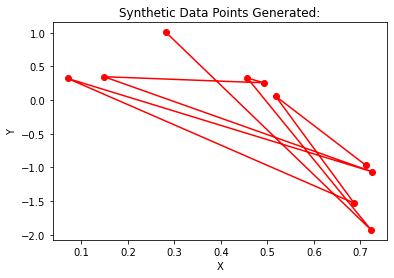

Would you like to train (part 1) again? no
test cost on degree 1: 0.6610099072917749
train cost on degree 1: 0.08837448574906324
test cost on degree 2: 0.4894652065957058
train cost on degree 2: 0.04286240917453397
test cost on degree 3: 0.4164376652493773
train cost on degree 3: 0.026730581254274584
test cost on degree 4: 0.38337162125432045
train cost on degree 4: 0.021200489711221817
test cost on degree 5: 0.3716718491568589
train cost on degree 5: 0.019757332062683628
test cost on degree 6: 0.3689482163190803
train cost on degree 6: 0.019991480145757037
test cost on degree 7: 0.36306391943766114
train cost on degree 7: 0.01871047383855485
test cost on degree 8: 0.3684728239906683
train cost on degree 8: 0.02033289209726976
test cost on degree 9: 0.3605533214213029
train cost on degree 9: 0.01849644036953765


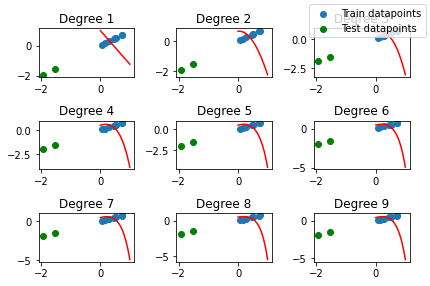

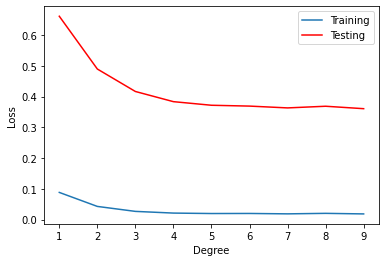

Best degree is 9


In [ ]:
#Plot for synthetic data points generated
plt.plot(X, Y, color = 'red', marker = "o")  
plt.title("Synthetic Data Points Generated:")  
plt.xlabel("X")
plt.ylabel("Y")  
plt.show()  

#all 9 different curves to fit for the dataser
def plot(show_fig = True):
	X_train_cost = []
	X_test_cost = []
	X_axis = range(1, 10)

	line_1 = 0
	line_2 = 0
	line_3 = 0

	for DEGREE in range(1, 10):
		try:
			W = np.load("W_"+str(DEGREE)+".npy")
		except:
			print("Please run part 1 to generate weights.")
			sys.exit(1)
		cost = 0.0
		for m in range(len(x_test)):
			X = x_test[m]
			Y = y_test[m]
			X_power = np.array([X**j for j in range(DEGREE+1)])

			Y_pred = np.dot(W, X_power)

			cost += (Y - Y_pred)**2

		cost /= 2* (m+1)
		print("test cost on degree "+str(DEGREE)+": "+str(cost))

		X_test_cost.append(cost)


		cost = 0.0
		for m in range(len(x_train)):
			X = x_train[m]
			Y = y_train[m]
			X_power = np.array([X**j for j in range(DEGREE+1)])

			Y_pred = np.dot(W, X_power)

			cost += (Y - Y_pred)**2

		cost /= 2* (m+1)
		print("train cost on degree "+str(DEGREE)+": "+str(cost))
		X_train_cost.append(cost)

		X_here = range(100)
		X_here = np.array(X_here, dtype=np.float) / 100
		Y_here = []	
		for m in range(len(X_here)):
			X = X_here[m]
			X_power = np.array([X**j for j in range(DEGREE+1)])

			Y_pred = np.dot(W, X_power)
			Y_here.append(Y_pred)

		if show_fig:
			plt.subplot(3,3,DEGREE)
			plt.tight_layout()
			line_1 = plt.scatter(x_train, x_train)
			line_2 = plt.scatter(y_test, y_test, color = "green")
			line_3 = plt.plot(X_here, Y_here, color="red")
			plt.title("Degree "+str(DEGREE))

	if show_fig:
		plt.figlegend((line_1, line_2, line_3), ("Train datapoints", "Test datapoints", "Approximated function"))
		plt.show()

		plt.plot(X_axis, X_train_cost, label = "Training")
		plt.plot(X_axis, X_test_cost, color="red", label = "Testing")
		plt.xlabel("Degree")
		plt.ylabel("Loss")
		plt.legend()
		plt.show()

	return np.argmin(X_test_cost) + 1

def call_plotter(show_fig = True):
	a = input("Would you like to train (part 1) again? ")
	if (a[0] == 'y' or a[0] == 'Y'):
		a = input("Would you like to regenerate the data? ")
		if (a[0] == 'y' or a[0] == 'Y'):
			num_data = int(input("Enter no of datapoints: "))
			generate_data(num_data)
		train()
		print("\n")
	return plot(show_fig)

if __name__ == "__main__":
	print("Best degree is "+ str(call_plotter()))



Would you like to auto compute an optimised degree? yes
Proceeding with degree 9


Data size 10: 

Degree: 1
Cost at iter 499/500: 0.10961123077038191
Degree: 2
Cost at iter 499/500: 0.06781195753942834
Degree: 3
Cost at iter 499/500: 0.05857480411406237
Degree: 4
Cost at iter 499/500: 0.05316568404024222
Degree: 5
Cost at iter 499/500: 0.048650802769661966
Degree: 6
Cost at iter 499/500: 0.058804096239602754
Degree: 7
Cost at iter 499/500: 0.05602473667599679
Degree: 8
Cost at iter 499/500: 0.05700347990763122
Degree: 9
Cost at iter 499/500: 0.0578820747088673

Data size 100: 

Degree: 1
Cost at iter 499/500: 0.10599845882442378
Degree: 2
Cost at iter 499/500: 0.07391346239431361
Degree: 3
Cost at iter 499/500: 0.06415838109753738
Degree: 4
Cost at iter 499/500: 0.053685894205366805
Degree: 5
Cost at iter 499/500: 0.05307371364392344
Degree: 6
Cost at iter 499/500: 0.04829104493712691
Degree: 7
Cost at iter 499/500: 0.04820964100848722
Degree: 8
Cost at iter 499/500: 0.055768173807652

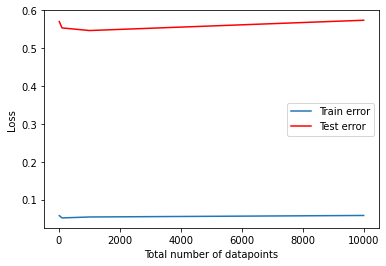

In [ ]:
def generate_data(NUM_DATA = 10):

	X = np.random.uniform(0, 1, NUM_DATA)


	noise = np.random.normal(0, 0.3, NUM_DATA)

	Y = np.sin(2 * np.pi * X) + noise

	cutoff = int(0.8 * NUM_DATA)

	perm = np.random.permutation(NUM_DATA)

	X = X[perm]
	Y = Y[perm]

	X_test = X[cutoff:]
	Y_test = Y[cutoff:]

	X_train = X[:cutoff]
	Y_train = Y[:cutoff]


def diff_data_size():
	n = 9
	a = input("Would you like to auto compute an optimised degree? ")
	if (a[0] == 'y' or a[0] == 'Y'):
		show_fig = False
	else:
		a = input("Would you like to enter a degree manually? ")
		if (a[0] == 'y' or a[0] == 'Y'):
			n = input("Pl enter the degree (max 9): ")

	print("Proceeding with degree "+str(n))
	print("\n\nData size 10: ")
	generate_data(10)
	train_10, test_10, rmse = train(500)
	print("\n\nData size 100: ")
	generate_data(100)
	train_100, test_100, rmse = train(500)
	print("\n\nData size 1000: ")
	generate_data(1000)
	train_1000, test_1000, rmse = train(500)
	print("\n\nData size 10000: ")
	generate_data(10000)
	train_10000, test_10000, rmse = train(500)

	train_erroes = [train_10[n-1], train_100[n-1], train_1000[n-1], train_10000[n-1]]
	test_erroes = [test_10[n-1], test_100[n-1], test_1000[n-1], test_10000[n-1]]

	X_axis = [10, 100, 1000, 10000]

	plt.plot(X_axis, train_erroes, label = "Train error")
	plt.plot(X_axis, test_erroes, color = "red", label = "Test error")
	plt.xlabel("Total number of datapoints")
	plt.ylabel("Loss")
	plt.legend()
	plt.show()


if __name__ == "__main__":
	diff_data_size()

In [ ]:
data=datasets.load_breast_cancer()


LR_X=pd.DataFrame(data.data,columns=data.feature_names)
print(LR_X)
LR_Y=pd.DataFrame(data.target)
print(LR_Y)


#normalization

rx = (LR_X - np.min(LR_X))/(np.max(LR_X) - np.min(LR_X)).values 
print(rx)

#splitting daatsets

rx_train,rx_test,ry_train,ry_test=tts(rx , LR_Y ,test_size=0.9,random_state=42)
print(rx_train.shape)
print(rx_test.shape)
print(ry_train.shape)
print(ry_test.shape)
xtrain=np.asarray(rx_train)
ytrain=np.asarray(ry_train)
xtest=np.asarray(rx_test)
ytest=np.asarray(ry_test)


rx1_train,rx1_test,ry1_train,ry1_test=tts(rx , LR_Y ,test_size=0.8,random_state=42)
print(rx1_train.shape)
print(rx1_test.shape)
print(ry1_train.shape)
print(ry1_test.shape)
xtrain1=np.asarray(rx1_train)
ytrain1=np.asarray(ry1_train)
xtest1=np.asarray(rx1_test)
ytest1=np.asarray(ry1_test)

rx2_train,rx2_test,ry2_train,ry2_test=tts(rx , LR_Y ,test_size=0.7,random_state=42)
print(rx2_train.shape)
print(rx2_test.shape)
print(ry2_train.shape)
print(ry2_test.shape)
xtrain2=np.asarray(rx2_train)
ytrain2=np.asarray(ry2_train)
xtest2=np.asarray(rx2_test)
ytest2=np.asarray(ry2_test)

rx3_train,rx3_test,ry3_train,ry3_test=tts(rx , LR_Y ,test_size=0.6,random_state=42)
print(rx3_train.shape)
print(rx3_test.shape)
print(ry3_train.shape)
print(ry3_test.shape)
xtrain3=np.asarray(rx3_train)
ytrain3=np.asarray(ry3_train)
xtest3=np.asarray(rx3_test)
ytest3=np.asarray(ry3_test)


rx4_train,rx4_test,ry4_train,ry4_test=tts(rx , LR_Y ,test_size=0.5,random_state=42)
print(rx4_train.shape)
print(rx4_test.shape)
print(ry4_train.shape)
print(ry4_test.shape)
xtrain4=np.asarray(rx4_train)
ytrain4=np.asarray(ry4_train)
xtest4=np.asarray(rx4_test)
ytest4=np.asarray(ry4_test)


rx5_train,rx5_test,ry5_train,ry5_test=tts(rx, LR_Y ,test_size=0.4,random_state=42)
print(rx5_train.shape)
print(rx5_test.shape)
print(ry5_train.shape)
print(ry5_test.shape)
xtrain5=np.asarray(rx5_train)
ytrain5=np.asarray(ry5_train)
xtest5=np.asarray(rx5_test)
ytest5=np.asarray(ry5_test)

#initializing alpha and iterations 

alpha=0.000001
iterations=10000

#initializing with weight and bias

def initialize(dim): 
	w = np.full((dim, 1), 0.01) 
	b = 0.0
	return w, b 


#calculate signmoid of x

def sigmoid(rz): 
    return 1/(1 + np.exp(-rz)) 
    
#Function for doing forward and back propogation

def propogation(x_t, y_t, w, b):
    
    l = x_t.shape[1] 

   
    Z = np.dot(w.T, x_t) + b;    
    A = sigmoid(Z)
    cost= -(1/l) * np.sum(y_t * np.log(A) + (1-y_t) * np.log(1-A))
    
    #Back Propogation
   
    dw = (1/l)* np.dot(x_t, (A-y_t).T)
    db = (1/l)* np.sum(A-y_t)
    
    grads= {"dw" : dw, "db" : db}
    
    return grads, cost


#optimizing

def optimize(x_t, y_t, w, b, iterations, alpha):
    
  
    
    for i in range(iterations):
 
        grads, cost = propogation(x_t, y_t, w, b)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - alpha * dw
        b = b - alpha * db
        
            
    parameters = {"w":w, "b":b}
    grads = {"dw":dw, "db":db}
    
    
    return parameters, grads

#Function for doing the predictions on the data set

def predict(x_t, w, b):
    
    l = x_t.shape[1] 
    
    y_pred =  np.zeros((1,l))
    
    w = w.reshape(x_t.shape[0], 1)
    
    A=sigmoid(np.dot(w.T, x_t)+b)
    
    
    for i in range(A.shape[1]):
        
        if(A[0,i]<0.5):
            y_pred[0,i]=0
        else:
            y_pred[0,i]=1
            
    
    return y_pred

#Function for calculating the Logistic Regression 

def LOG_REG(Xtrain, Ytrain, iterations, alpha):
    
    dim = Xtrain.shape[0] 
    
    w,b = initialize(dim)
    
    parameters, grads = optimize(Xtrain, Ytrain, w, b, iterations, alpha) 
    
    w = parameters["w"]
    b = parameters["b"]
        
    
    d={"w":w, "b":b}
    
    return d




     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]
     0
0    0
1    0
2    0
3    0
4    0
..  ..
56

In [ ]:
#Training and testing
print("For Training Data 10% : \n",) 
ans=LOG_REG(xtrain.T,ytrain.T,iterations,alpha)

w=ans["w"]
b=ans["b"]
Y_pred_train = predict(xtrain.T, w, b)
Y_pred_test = predict(xtest.T, w, b)
train=100 - np.mean(np.abs(Y_pred_train - ytrain.T))*100
test=100 - np.mean(np.abs(Y_pred_test - ytest.T))*100
print("\nTrain accuracy: {}% ".format(train))
print("\nTest accuracy: {} %".format(test))

print("For Training Data 20% : \n",) 

ans1=LOG_REG(xtrain1.T,ytrain1.T,iterations,alpha)

w1=ans1["w"]
b1=ans1["b"]
Y_pred_train = predict(xtrain1.T, w1, b1)
Y_pred_test = predict(xtest1.T, w1, b1)
train1=100 - np.mean(np.abs(Y_pred_train - ytrain1.T))*100
test1=100 - np.mean(np.abs(Y_pred_test - ytest1.T))*100
print("\nTrain1 accuracy: {}% ".format(train1))
print("\nTest1 accuracy: {} %".format(test1))


print("For Training Data 30% : \n",) 

ans2=LOG_REG(xtrain2.T,ytrain2.T,iterations,alpha)

w2=ans2["w"]
b2=ans2["b"]
Y_pred_train = predict(xtrain2.T, w2, b2)
Y_pred_test = predict(xtest2.T, w2, b2)
train2=100 - np.mean(np.abs(Y_pred_train - ytrain2.T))*100
test2=100 - np.mean(np.abs(Y_pred_test - ytest2.T))*100
print("\nTrain2 accuracy: {}% ".format(train2))
print("\nTest2 accuracy: {} %".format(test2))


print("For Training Data 40% : \n",) 

ans3=LOG_REG(xtrain3.T,ytrain3.T,iterations,alpha)

w3=ans3["w"]
b3=ans3["b"]
Y_pred_train = predict(xtrain3.T, w3, b3)
Y_pred_test = predict(xtest3.T, w3, b3)
train3=100 - np.mean(np.abs(Y_pred_train - ytrain3.T))*100
test3=100 - np.mean(np.abs(Y_pred_test - ytest3.T))*100
print("\nTrain3 accuracy: {}% ".format(train3))
print("\nTest3 accuracy: {} %".format(test3))

print("For Training Data 50% : \n",)  

ans4=LOG_REG(xtrain4.T,ytrain4.T,iterations,alpha)

w4=ans4["w"]
b4=ans4["b"]
Y_pred_train = predict(xtrain4.T, w4, b4)
Y_pred_test = predict(xtest4.T, w4, b4)
train4=100 - np.mean(np.abs(Y_pred_train - ytrain4.T))*100
test4=100 - np.mean(np.abs(Y_pred_test - ytest4.T))*100
print("\nTrain4 accuracy: {}% ".format(train4))
print("\nTest4 accuracy: {} %".format(test4))

print("For Training Data 60% : \n",) 

ans5=LOG_REG(xtrain5.T,ytrain5.T,iterations,alpha)

w5=ans5["w"]
b5=ans5["b"]
Y_pred_train = predict(xtrain5.T, w5, b5)
Y_pred_test = predict(xtest5.T, w5, b5)
train5=100 - np.mean(np.abs(Y_pred_train - ytrain5.T))*100
test5=100 - np.mean(np.abs(Y_pred_test - ytest5.T))*100
print("\nTrain5 accuracy: {}% ".format(train5))
print("\nTest5 accuracy: {} %".format(test5))

#Saving Result to the CSV File
 
def write_to_csv(output):
  df_output =  pd.DataFrame(output,columns=['1. Amount of randomly selected training data','2.Training Accuracy(in %)','3.Test Accuracy(in %)'],dtype=float)
  df_output.to_csv('output.csv')
 
write_to_csv([['10%',train,test],['20%',train1,test1],['30%',train2,test2],['40%',train3,test3],['50%',train4,test4],['60%',train5,test5]])

For Training Data 10% : 


Train accuracy: 66.07142857142857% 

Test accuracy: 62.37816764132554 %
For Training Data 20% : 


Train1 accuracy: 59.292035398230084% 

Test1 accuracy: 63.59649122807017 %
For Training Data 30% : 


Train2 accuracy: 57.64705882352941% 

Test2 accuracy: 64.91228070175438 %
For Training Data 40% : 


Train3 accuracy: 60.79295154185022% 

Test3 accuracy: 64.03508771929825 %
For Training Data 50% : 


Train4 accuracy: 59.859154929577464% 

Test4 accuracy: 65.61403508771929 %
For Training Data 60% : 


Train5 accuracy: 61.29032258064516% 

Test5 accuracy: 64.91228070175438 %
